# **About Dataset -- Dataset From KAGGLE**

## **Dataset --> drug200.csv(6.03 kB)**

## **Problem statement:** Prediction  of the drugs type that might be suitable for the patient.

This dataset contains information about drug classification based on patient general information and its diagnosis. Machine learning model is needed in order to predict the outcome of the drugs type that might be suitable for the patient.
Here we will use Random Forest Classifier to predict the outcome of the drug types and we will save the model with Pickle and later we will deploy the model using Flask.

## **About the dataset:**

Age: Age of patient

Sex: Gender of patient

BP: Blood pressure of patient

Cholesterol: Cholesterol of patient

Na_to_K: Sodium to Potassium Ratio in Blood

Drug: Drug Type

**Content**


The target feature is

Drug type




The feature sets are:

Age

Sex

Blood Pressure Levels (BP)

Cholesterol Levels

Na to Potassium Ration

# **Dataset Upload**

In [ ]:
from google.colab import files
file = files.upload()

Saving drug200.csv to drug200.csv


# **Importing Required Libraries**

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pickle
import warnings
warnings.filterwarnings('ignore')

# **Read Dataset**

In [ ]:
df = pd.read_csv('drug200.csv')
df

,Age,Sex,BP,Cholesterol,Na_to_K,Drug
0,23,F,HIGH,HIGH,25.355,DrugY
1,47,M,LOW,HIGH,13.093,drugC
2,47,M,LOW,HIGH,10.114,drugC
3,28,F,NORMAL,HIGH,7.798,drugX
4,61,F,LOW,HIGH,18.043,DrugY
...,...,...,...,...,...,...
195,56,F,LOW,HIGH,11.567,drugC
196,16,M,LOW,HIGH,12.006,drugC
197,52,M,NORMAL,HIGH,9.894,drugX
198,23,M,NORMAL,NORMAL,14.020,drugX


# **Dataset Information**

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Age          200 non-null    int64  
 1   Sex          200 non-null    object 
 2   BP           200 non-null    object 
 3   Cholesterol  200 non-null    object 
 4   Na_to_K      200 non-null    float64
 5   Drug         200 non-null    object 
dtypes: float64(1), int64(1), object(4)
memory usage: 9.5+ KB


# **Dataset Description**

In [ ]:
df.describe()

,Age,Na_to_K
count,200.000000,200.000000
mean,44.315000,16.084485
std,16.544315,7.223956
min,15.000000,6.269000
25%,31.000000,10.445500
50%,45.000000,13.936500
75%,58.000000,19.380000
max,74.000000,38.247000


In [ ]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Age,200.0,44.315000,16.544315,15.000,31.0000,45.0000,58.00,74.000
Na_to_K,200.0,16.084485,7.223956,6.269,10.4455,13.9365,19.38,38.247


Here, we can see,

Minimum Age of patients is 15 and maximum is 74

and 50% is in the age range of 45.

In [ ]:
df.describe(include = 'object')

,Sex,BP,Cholesterol,Drug
count,200,200,200,200
unique,2,3,2,5
top,M,HIGH,HIGH,DrugY
freq,104,77,103,91


In [ ]:
df.describe(include = 'object').T

,count,unique,top,freq
Sex,200,2,M,104
BP,200,3,HIGH,77
Cholesterol,200,2,HIGH,103
Drug,200,5,DrugY,91


In [ ]:
df.describe(include = 'all')

,Age,Sex,BP,Cholesterol,Na_to_K,Drug
count,200.000000,200,200,200,200.000000,200
unique,NaN,2,3,2,NaN,5
top,NaN,M,HIGH,HIGH,NaN,DrugY
freq,NaN,104,77,103,NaN,91
mean,44.315000,NaN,NaN,NaN,16.084485,NaN
std,16.544315,NaN,NaN,NaN,7.223956,NaN
min,15.000000,NaN,NaN,NaN,6.269000,NaN
25%,31.000000,NaN,NaN,NaN,10.445500,NaN
50%,45.000000,NaN,NaN,NaN,13.936500,NaN
75%,58.000000,NaN,NaN,NaN,19.380000,NaN


In [ ]:
df.describe(include = 'all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
Age,200.0,NaN,NaN,NaN,44.315,16.544315,15.0,31.0,45.0,58.0,74.0
Sex,200,2,M,104,NaN,NaN,NaN,NaN,NaN,NaN,NaN
BP,200,3,HIGH,77,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Cholesterol,200,2,HIGH,103,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Na_to_K,200.0,NaN,NaN,NaN,16.084485,7.223956,6.269,10.4455,13.9365,19.38,38.247
Drug,200,5,DrugY,91,NaN,NaN,NaN,NaN,NaN,NaN,NaN


# **Total no. of Rows and Columns in Dataset**

In [ ]:
df.shape

(200, 6)

In [ ]:
df.columns

Index(['Age', 'Sex', 'BP', 'Cholesterol', 'Na_to_K', 'Drug'], dtype='object')

# **Missing Data Checking**

In [ ]:
df.isnull().sum()

Age            0
Sex            0
BP             0
Cholesterol    0
Na_to_K        0
Drug           0
dtype: int64

The dataset does not have any missing data

# **The First 5 Columns of Dataset**





In [ ]:
df.head()

,Age,Sex,BP,Cholesterol,Na_to_K,Drug
0,23,F,HIGH,HIGH,25.355,DrugY
1,47,M,LOW,HIGH,13.093,drugC
2,47,M,LOW,HIGH,10.114,drugC
3,28,F,NORMAL,HIGH,7.798,drugX
4,61,F,LOW,HIGH,18.043,DrugY


# **The Last 5 Columns of Dataset**

In [ ]:
df.tail()

,Age,Sex,BP,Cholesterol,Na_to_K,Drug
195,56,F,LOW,HIGH,11.567,drugC
196,16,M,LOW,HIGH,12.006,drugC
197,52,M,NORMAL,HIGH,9.894,drugX
198,23,M,NORMAL,NORMAL,14.020,drugX
199,40,F,LOW,NORMAL,11.349,drugX


# **Mean Values Group by Drugs**


In [ ]:
df.groupby('Drug').mean()

,Age,Na_to_K
Drug,,
DrugY,43.747253,22.374780
drugA,35.869565,10.918783
drugB,62.500000,11.524375
drugC,42.500000,10.633750
drugX,44.018519,10.650556


# **Correlation Analysis**

In [ ]:
cor = df.corr()
cor

,Age,Na_to_K
Age,1.000000,-0.063119
Na_to_K,-0.063119,1.000000


# **Heatmap**

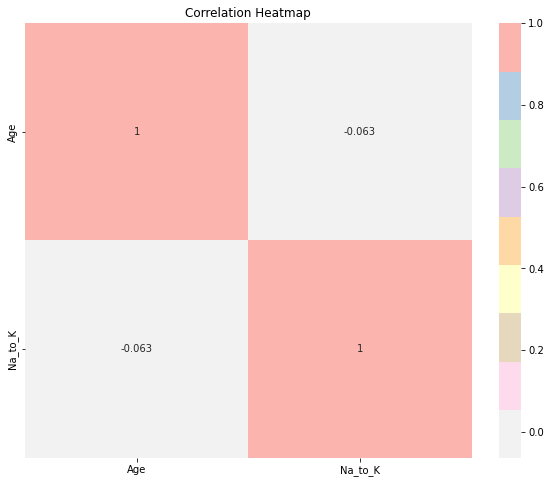

In [ ]:
plt.figure(figsize=(10, 8))
sns.heatmap(cor, annot = True, cmap = 'Pastel1_r')
plt.title('Correlation Heatmap')
plt.show()

Here, we got only Age and Sodium to Potassium Ratio in Blood correlation, which is negative correlation. Later we will try to compare the correlation among all columns.

# **Unique Values Counts For Each Column**

In [ ]:
df.nunique()

Age             57
Sex              2
BP               3
Cholesterol      2
Na_to_K        198
Drug             5
dtype: int64

In [ ]:
print(df['Sex'].nunique())
df['Sex'].value_counts()

2


M    104
F     96
Name: Sex, dtype: int64

In [ ]:
print(df['BP'].nunique())
df['BP'].value_counts()

3


HIGH      77
LOW       64
NORMAL    59
Name: BP, dtype: int64

In [ ]:
print(df['Cholesterol'].nunique())
df['Cholesterol'].value_counts()

2


HIGH      103
NORMAL     97
Name: Cholesterol, dtype: int64

In [ ]:
print(df['Drug'].nunique())
df['Drug'].value_counts()

5


DrugY    91
drugX    54
drugA    23
drugC    16
drugB    16
Name: Drug, dtype: int64

In [ ]:
print(df['Age'].nunique())
df['Age'].value_counts()

57


47    8
23    7
28    7
49    7
39    6
32    6
50    5
37    5
58    5
60    5
22    5
34    4
72    4
51    4
42    4
26    4
24    4
74    4
67    4
68    4
61    4
56    4
20    4
36    4
45    4
41    4
31    4
43    4
65    4
57    4
53    3
40    3
70    3
59    3
16    3
38    3
15    3
69    3
35    3
18    3
64    3
52    2
55    2
62    2
19    2
29    2
66    2
73    2
46    2
48    2
54    1
17    1
33    1
63    1
30    1
21    1
25    1
Name: Age, dtype: int64

# **Exploratory Data Analysis**

## **Age Distribution**

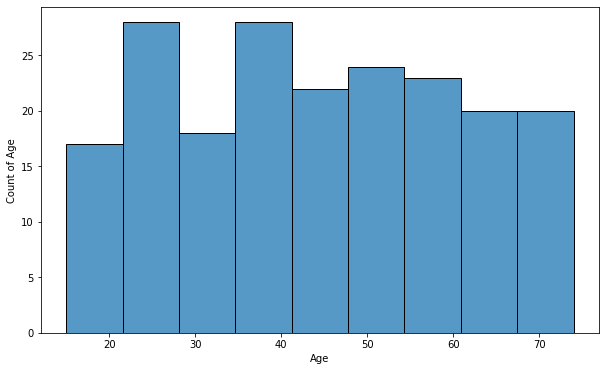

In [ ]:
plt.figure(figsize = (10, 6))
sns.histplot(data = df, x='Age', bins = 'auto')
plt.xlabel('Age')
plt.ylabel('Count of Age')
plt.show()


The age of people lies between 15 to 74. Maximum people are the age of 47.

## **Sodium to Potassium Ratio in Blood (Na_to_K) Distribution**

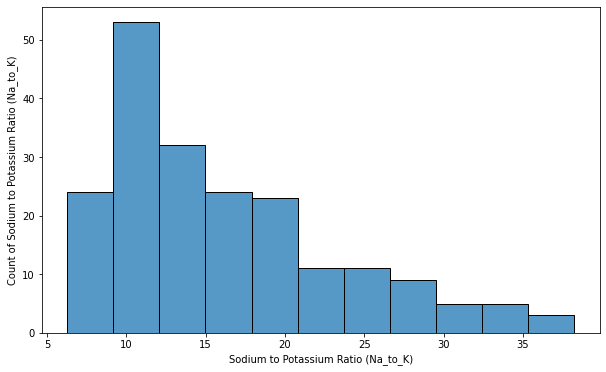

In [ ]:
plt.figure(figsize = (10, 6))
sns.histplot(data = df, x ='Na_to_K', bins = 'auto')
plt.xlabel('Sodium to Potassium Ratio (Na_to_K)')
plt.ylabel('Count of Sodium to Potassium Ratio (Na_to_K)')
plt.show()


mostly patients have the sodium to potassium ratio in between 10-12.

## **Sex or Gender Distribution**

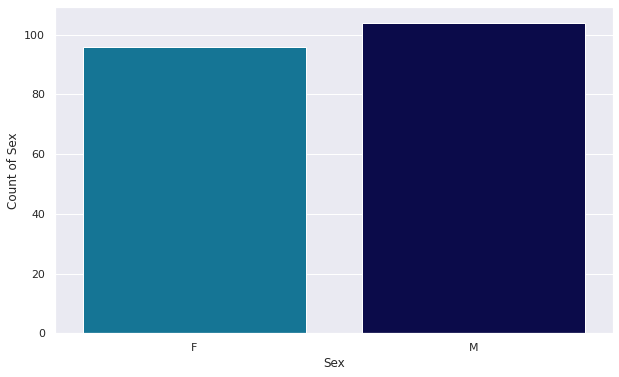

In [ ]:
sns.set_theme(style = 'darkgrid')
plt.figure(figsize = (10, 6))
sns.countplot(data = df, x = 'Sex', palette = 'ocean_r')
plt.xlabel('Sex')
plt.ylabel('Count of Sex')
plt.show()

The count of male patients is higher than female patients

## **Blood pressure Distribution**









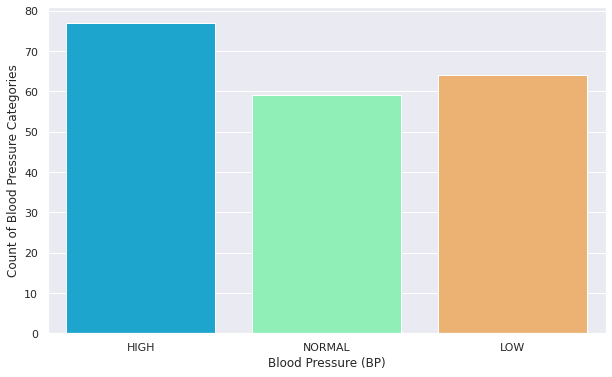

In [ ]:
sns.set_theme(style = 'darkgrid')
plt.figure(figsize = (10, 6))
sns.countplot(data = df, x = 'BP', palette = 'rainbow', order = ['HIGH', 'NORMAL', 'LOW'])
plt.xlabel('Blood Pressure (BP)')
plt.ylabel('Count of Blood Pressure Categories')
plt.show()

Mostly patients have high BP compare to Normal and Low BP.

Or, The High Blood pressure counts more than any other category

## **Cholesterol Distribution**

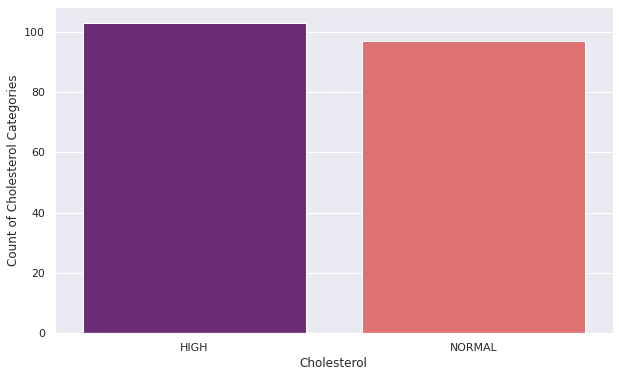

In [ ]:
sns.set_theme(style = 'darkgrid')
plt.figure(figsize = (10, 6))
sns.countplot(data = df, x = 'Cholesterol', palette = 'magma')
plt.xlabel('Cholesterol')
plt.ylabel('Count of Cholesterol Categories')
plt.show()


People with high Cholesterol count is higher than Normal Cholesterol.

## **Drug Type Distribution**

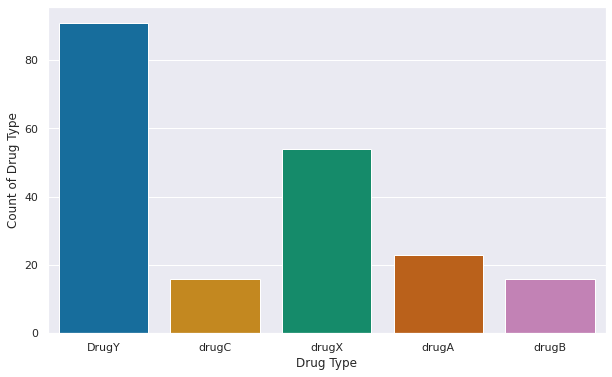

In [ ]:
sns.set_theme(style = 'darkgrid')
plt.figure(figsize = (10, 6))
sns.countplot(data = df, x = 'Drug', palette = 'colorblind')
plt.xlabel('Drug Type')
plt.ylabel('Count of Drug Type')
plt.show()


5 types of drug taken by patients. Mostly patient are taking DrugY.

DrugY has more amount than other types of drugs.

## **Countplot between Sex, BP, Cholesterol and Drug.**

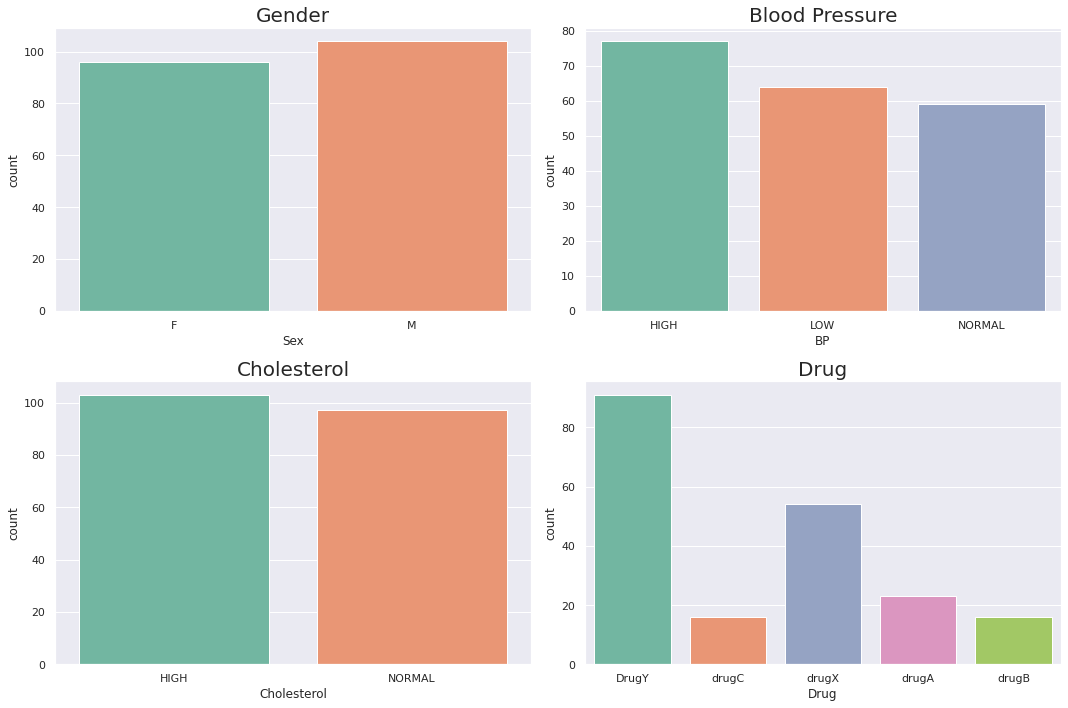

In [ ]:
plt.figure(figsize = (15,10))

plt.subplot(2, 2, 1)
sns.countplot(data = df, x = 'Sex', palette = 'Set2' )
plt.title('Gender', size = 20)
plt.tight_layout()


plt.subplot(2,2,2)
sns.countplot( data = df, x = 'BP', palette = 'Set2')
plt.title('Blood Pressure', size = 20)
plt.tight_layout()


plt.subplot(2,2,3)
sns.countplot(data = df, x = 'Cholesterol', palette = 'Set2')
plt.title('Cholesterol', size = 20)
plt.tight_layout()


plt.subplot(2,2,4)
sns.countplot(data = df, x = 'Drug', palette = 'Set2')
plt.title('Drug', size = 20)
plt.tight_layout()




The number of Drug Y is higher than others.

## **Drug by Age**

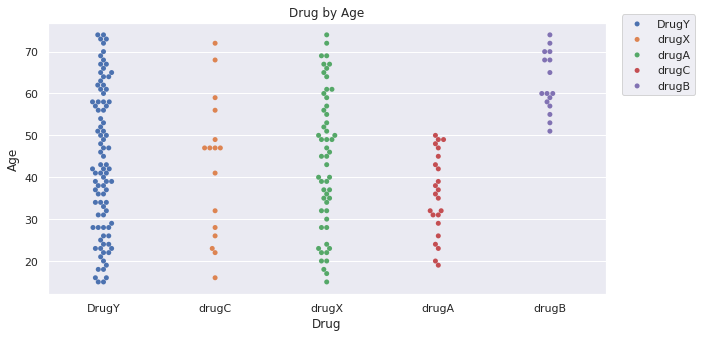

In [ ]:
plt.figure(figsize = (10,5))
sns.swarmplot( data = df, x = 'Drug', y = 'Age')
plt.legend(df.Drug.value_counts().index,bbox_to_anchor = (1.17, 1.05))
plt.title('Drug by Age')
plt.show()

<Figure size 864x360 with 0 Axes>

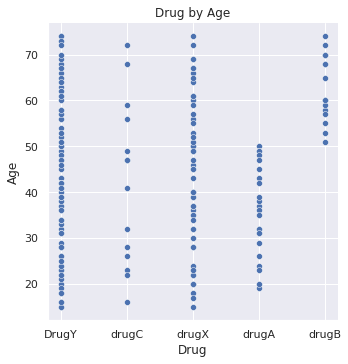

In [ ]:
plt.figure(figsize = (12,5))
sns.relplot(data = df, x = 'Drug', y = 'Age', palette= 'Paired')
plt.title('Drug by Age')
plt.show()

drugB is taken only by older than 51 years old.

drugA is taken only by younger than 50 years old.

DrugY and drugX is heavily taken by all ages people, compare to drugC.

## **Drug by Sex/Gender**

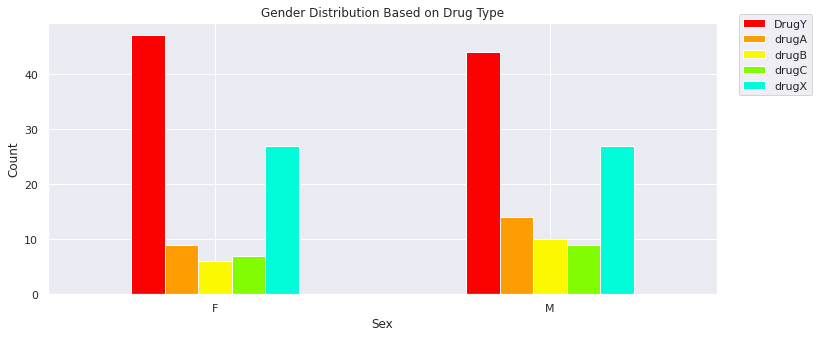

In [ ]:
pd.crosstab(df.Sex, df.Drug).plot(kind = 'bar', figsize =(12,5), color = ['#FC0101','#FC9D01','#FCF801','#82FC01','#01FCDA'])
plt.title('Gender Distribution Based on Drug Type')
plt.legend(bbox_to_anchor = (1.15, 1.05))
plt.xlabel('Sex')
plt.xticks(rotation = 0)
plt.ylabel('Count')
plt.show()

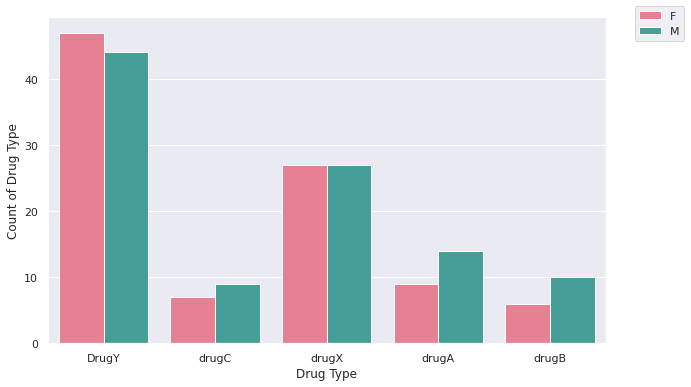

In [ ]:
sns.set_theme(style = 'darkgrid')
plt.figure(figsize = (10, 6))
sns.countplot(data = df, x = 'Drug',  hue = 'Sex', palette = 'husl')
plt.legend(bbox_to_anchor = (1.15, 1.05))
plt.xlabel('Drug Type')
plt.ylabel('Count of Drug Type')
plt.show()

It can be observed that for both Male and Female, 

DrugY is usually recommended, 

and as a second option, DrugX is usually recommended.

Male people get drugA, drugB and drugC more than females.

Females get DrugY more than males.

drugX seems equal for males and females.



## **Drug by Blood Pressure**

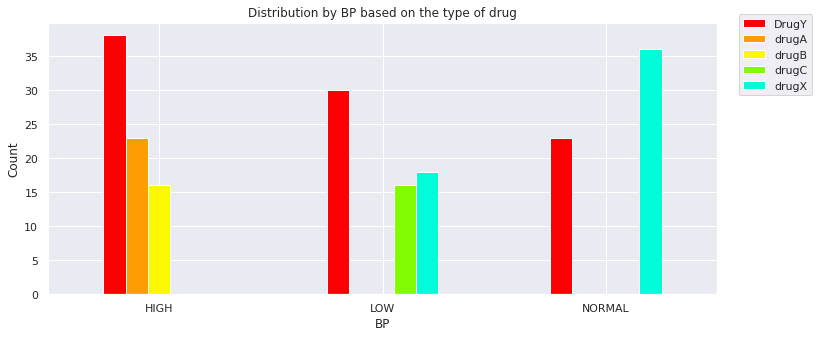

In [ ]:
pd.crosstab(df.BP, df.Drug).plot(kind = 'bar', figsize = (12,5), color = ['#FC0101','#FC9D01','#FCF801','#82FC01','#01FCDA'])
plt.title('Distribution by BP based on the type of drug')
plt.legend(bbox_to_anchor = (1.15, 1.05))
plt.xlabel('BP')
plt.xticks(rotation = 0)
plt.ylabel('Count')
plt.show()

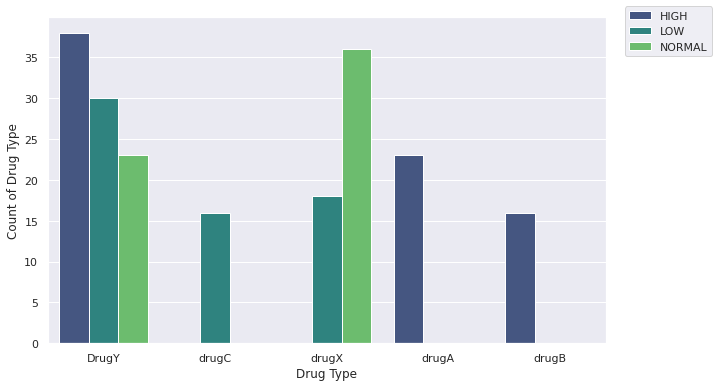

In [ ]:
sns.set_theme(style = 'darkgrid')
plt.figure(figsize = (10, 6))
sns.countplot(data = df, x = 'Drug',  hue = 'BP', palette = 'viridis')
plt.legend(bbox_to_anchor = (1.2, 1.05))
plt.xlabel('Drug Type')
plt.ylabel('Count of Drug Type')
plt.show()

In the case of BP, 

DrugY is usually used for both categories.

drugX is more recommended in Normal BP.

drugA is the second option in High BP, after DrugY.

drugA and drugB are got only by people who have HIGH blood pressure.

drugC is got only by people who have Low blood pressure.



## **Drug by Cholesterol**

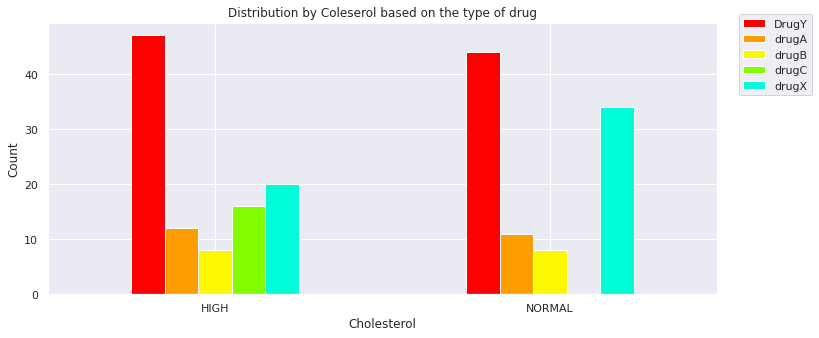

In [ ]:
pd.crosstab(df.Cholesterol, df.Drug).plot(kind = 'bar', figsize = (12,5), color = ['#FC0101','#FC9D01','#FCF801','#82FC01','#01FCDA'])
plt.title('Distribution by Coleserol based on the type of drug')
plt.legend(bbox_to_anchor = (1.15, 1.05))
plt.xlabel('Cholesterol')
plt.xticks(rotation = 0)
plt.ylabel('Count')
plt.show()

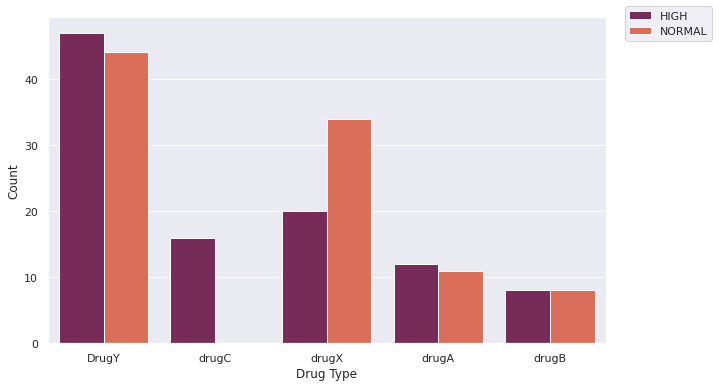

In [ ]:
sns.set_theme(style = 'darkgrid')
plt.figure(figsize = (10, 6))
sns.countplot(data = df, x = 'Drug',  hue = 'Cholesterol', palette = 'rocket')
plt.legend(bbox_to_anchor = (1.2, 1.05))
plt.xlabel('Drug Type')
plt.ylabel('Count')
plt.show()

In the case of Cholesterol, 

it is very similar to that of Sex, since drug Y is mostly recommended 

and drug X is the second option.

drugC is got only by people who have HIGH cholesterol.

drugB seems equal for both High and Normal Cholesterol.



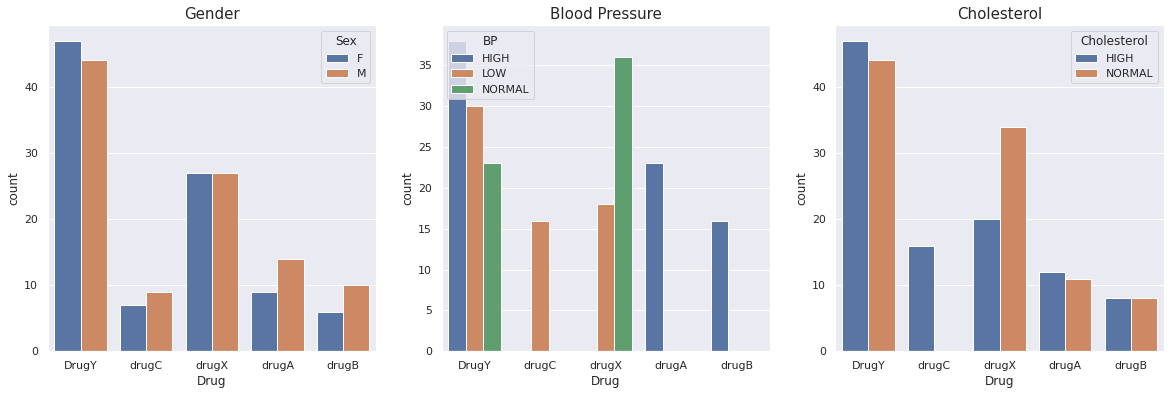

In [ ]:
plt.figure(figsize = (20,6))

plt.subplot(1,3,1)
sns.countplot(data = df, x = 'Drug', hue = 'Sex')
plt.title('Gender', size = 15)


plt.subplot(1,3,2)
sns.countplot(data = df, x = 'Drug', hue = 'BP')
plt.title('Blood Pressure', size = 15)

plt.subplot(1,3,3)
sns.countplot(data = df, x = 'Drug', hue = 'Cholesterol')
plt.title('Cholesterol', size = 15)

plt.show()

1.Gender : More males take drug A,B,C than females, but females use drug Y more than males. Drug X is almost the same for two genders.



2.BP : Drug Y can be used in different BP. Drug C is only for low pressure but drug A and B only for high pressure. This is an important feature.



3.Cholesterol : drug C only taken by people who have high cholesterol

## **Drug by Na_to_K**

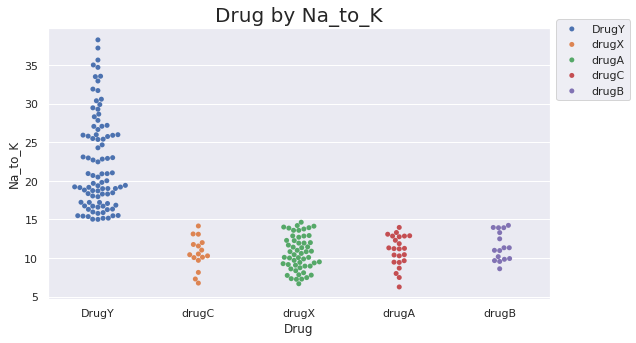

In [ ]:
plt.figure(figsize = (9,5))
sns.swarmplot(data = df, x = 'Drug', y = 'Na_to_K')
plt.legend(df['Drug'].value_counts().index,bbox_to_anchor = (1.17, 1.05))
plt.title('Drug by Na_to_K', size = 20)
plt.show()

People have Na_to_K ratio which is bigger than 15, get DrugY, 

and  below 15 Na_to_K ratio, others get the othertypes of  drugs.

*Usually Na_to_K balance is related to the balance of blood. Therefore, we should visualize the relation between BP and Na_to_K with Drug.*

## **Na_to_K with Drug and BP.**

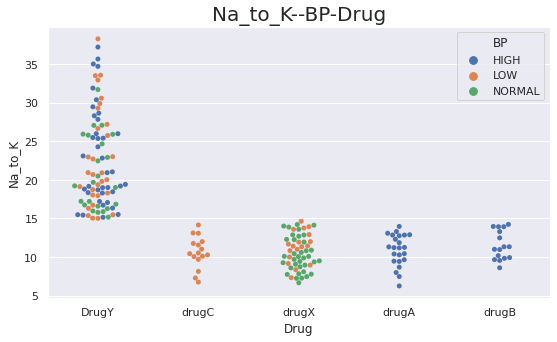

In [ ]:
plt.figure(figsize = (9,5))
sns.swarmplot(data = df, x = 'Drug', y = 'Na_to_K', hue = 'BP')
plt.title('Na_to_K--BP-Drug', size = 20)
plt.show()





All three types of blood pressure (BP) cover the whole range of Na_to_K

## **Na_to_K by Gender**

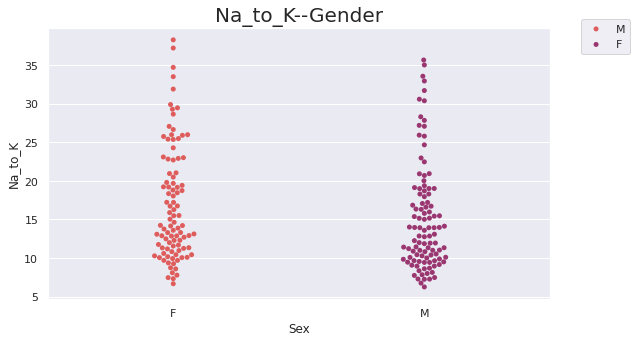

In [ ]:
plt.figure(figsize = (9,5))
sns.swarmplot(data = df, x = 'Sex', y = 'Na_to_K', palette = 'flare')
plt.legend(df['Sex'].value_counts().index,bbox_to_anchor = (1.17, 1.05))
plt.title('Na_to_K--Gender', size = 20)
plt.show()


Na_to_K ratio is slightly higher among Female compare to male

## **Age by Sex/Gender**

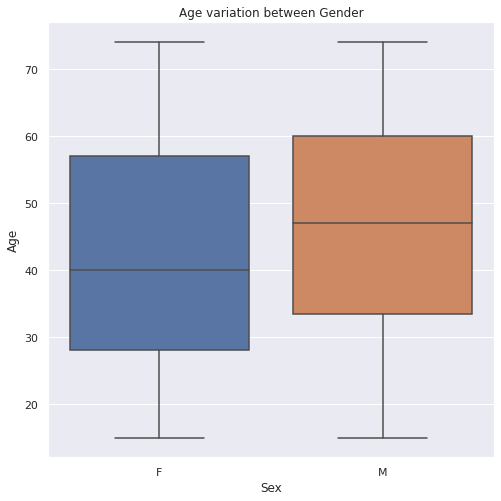

In [ ]:
plt.figure(figsize = (8,8))
sns.boxplot(data = df, x = 'Sex', y = 'Age')
plt.title('Age variation between Gender')
plt.show()

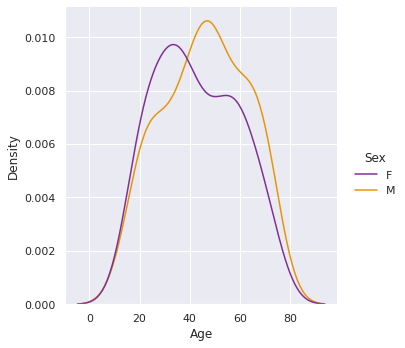

In [ ]:
sns.displot(data = df, x = 'Age', hue = 'Sex', kind = 'kde', palette = 'CMRmap')

Maximum males are between the 45-49 age and female are between 35-39 and 55-59 age range.

## **Age by BP**

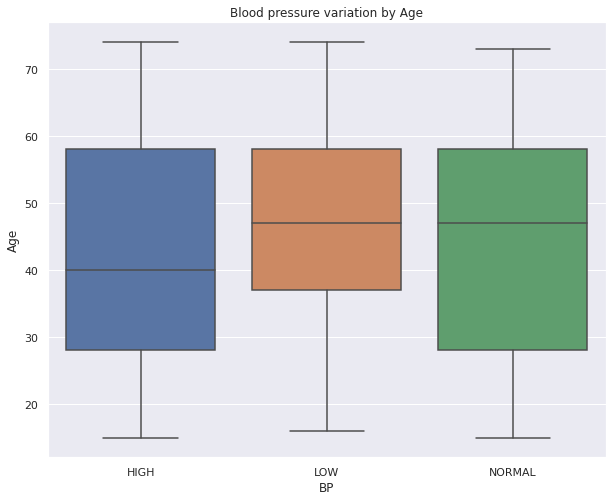

In [ ]:
plt.figure(figsize = (10,8))
sns.boxplot(data = df, x = 'BP', y = 'Age')
plt.title('Blood pressure variation by Age')
plt.show()

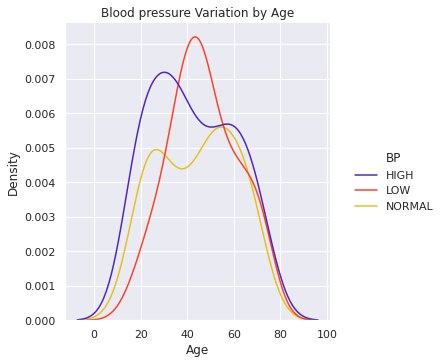

In [ ]:
sns.displot(data = df, x = 'Age', hue = 'BP', kind = 'kde', palette = 'CMRmap')
plt.title('Blood pressure Variation by Age')
plt.show()

Mostly patients belong to age group of 30-42 having High BP.

Mostly patients belong to age group of 45-50 having low BP.

Mostly patients belong to age group of 55-60 having  Normal BP.


Also LOW BP follows a noraml distribution.


## **Age by Cholesterol**

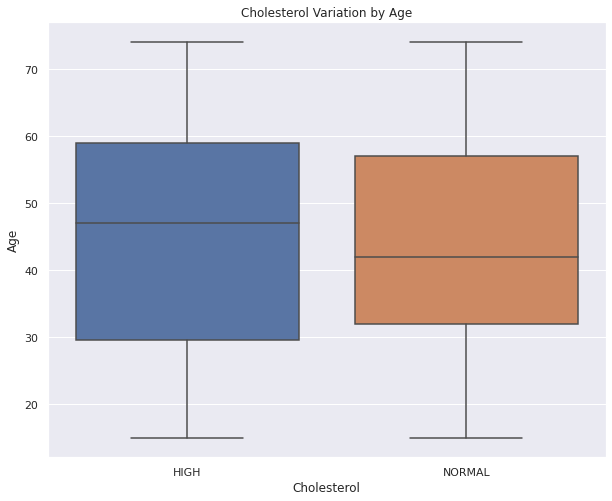

In [ ]:
plt.figure(figsize = (10,8))
sns.boxplot(data = df, x = 'Cholesterol', y = 'Age')
plt.title('Cholesterol Variation by Age')
plt.show()

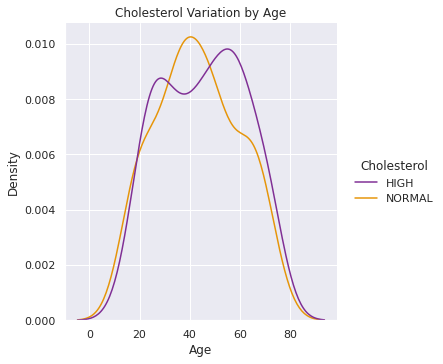

In [ ]:
sns.displot(data = df, x = 'Age', hue = 'Cholesterol', kind = 'kde', palette = 'CMRmap')
plt.title('Cholesterol Variation by Age')
plt.show()

Mostly patients belong to age group of 30-40 having Normal Cholesterol .

Mostly patients belong to age group of 45-58 having High Cholesterol.

Also Normal Cholesterol follows a noraml distribution.

#**Pairplot**

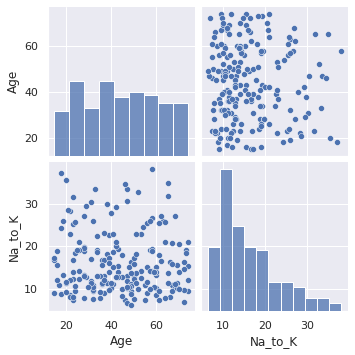

In [ ]:
sns.pairplot(df)
plt.show()

From the above pairplot we can see the overall correlation of numerical columns of the dataset.

# **Data preprocessing**

# **Data Mapping**

In [ ]:
df.Sex = df.Sex.map({'M':1,'F':2}) 

In [ ]:
df.BP = df.BP.map({'HIGH':2,'NORMAL':1,'LOW':0})

In [ ]:
df.Cholesterol = df.Cholesterol.map({'HIGH':1,'NORMAL':0})

In [ ]:
df.Drug = df.Drug.map({'DrugY':1,'drugX':2 ,'drugA':3 , 'drugC':4,'drugB':5 })



In [ ]:
df.head()

,Age,Sex,BP,Cholesterol,Na_to_K,Drug
0,23,2,2,1,25.355,1
1,47,1,0,1,13.093,4
2,47,1,0,1,10.114,4
3,28,2,1,1,7.798,2
4,61,2,0,1,18.043,1


In [ ]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Age,200.0,44.315000,16.544315,15.000,31.0000,45.0000,58.00,74.000
Sex,200.0,1.480000,0.500854,1.000,1.0000,1.0000,2.00,2.000
BP,200.0,1.065000,0.839224,0.000,0.0000,1.0000,2.00,2.000
Cholesterol,200.0,0.515000,0.501029,0.000,0.0000,1.0000,1.00,1.000
Na_to_K,200.0,16.084485,7.223956,6.269,10.4455,13.9365,19.38,38.247
Drug,200.0,2.060000,1.270619,1.000,1.0000,2.0000,3.00,5.000


In [ ]:
cor = df.corr()
cor

,Age,Sex,BP,Cholesterol,Na_to_K,Drug
Age,1.000000,-0.102027,-0.120918,0.068234,-0.063119,0.160692
Sex,-0.102027,1.000000,0.044952,-0.008811,0.125008,-0.092860
BP,-0.120918,0.044952,1.000000,-0.032208,0.036871,0.142413
Cholesterol,0.068234,-0.008811,-0.032208,1.000000,-0.010000,0.116981
Na_to_K,-0.063119,0.125008,0.036871,-0.010000,1.000000,-0.593746
Drug,0.160692,-0.092860,0.142413,0.116981,-0.593746,1.000000


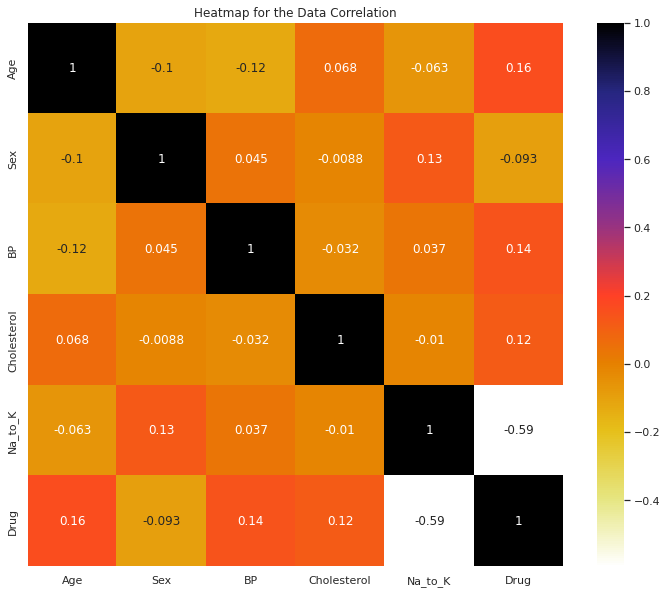

In [ ]:
plt.figure(figsize=(12,10))
sns.heatmap(cor, annot= True, cmap=plt.cm.CMRmap_r)
plt.title('Heatmap for the Data Correlation')
plt.show()

There isn't much correlation in the data.

No strong correlstion is visible among any columns.

Only very week or negligible and negative correlation is visible.

Age has negetive correlation with Sex, BP and Na_to_K.

Sex has negative correlation with Age, Drug and Cholesterol.

BP has negative correlation with Cholesterol and Age.

Cholesterol has negative correlation with Na_to_K, BP and Gender.

Na_to_K has negative correlation with Drug, Cholesterol and Age.

Drug has negative corrletion with Na_to_K and Sex and very weak or negligible correlation with Age, BP and Cholesterol.


# **Model Building**

# **Train and Test Dataset**

In [ ]:
from sklearn.model_selection import train_test_split

X = df.drop('Drug', axis = 1)
y = df.Drug

X_train,X_test,y_train,y_test = train_test_split(X, y, test_size = 0.3, random_state = 45, stratify=y)

In [ ]:
X_train.shape, X_test.shape

((140, 5), (60, 5))

# **Random Forest Classifier**

In [ ]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(n_jobs = -1, n_estimators = 100, max_features = 5, random_state = 45)

rf.fit(X_train, y_train)

predict = rf.predict(X_test)

predict

array([5, 1, 1, 1, 2, 1, 1, 4, 2, 2, 1, 2, 3, 1, 1, 1, 3, 2, 1, 1, 2, 5,
       2, 1, 1, 1, 2, 2, 3, 4, 1, 1, 1, 1, 1, 1, 1, 1, 1, 3, 3, 1, 5, 4,
       2, 4, 2, 2, 3, 2, 2, 2, 1, 5, 3, 5, 4, 1, 1, 1])

# **Evaluation Metric**

In [ ]:
from sklearn.metrics import classification_report

report = classification_report(y_test, predict)

print(report)

              precision    recall  f1-score   support

           1       0.96      1.00      0.98        27
           2       1.00      0.94      0.97        16
           3       1.00      1.00      1.00         7
           4       1.00      1.00      1.00         5
           5       1.00      1.00      1.00         5

    accuracy                           0.98        60
   macro avg       0.99      0.99      0.99        60
weighted avg       0.98      0.98      0.98        60



# **Accuracy**

## **Accuracy of Training & Testing**

In [ ]:
from sklearn.metrics import accuracy_score

acc = accuracy_score(y_test, predict)
print("accuracy_score: ", acc)

accuracy_score:  0.9833333333333333


In [ ]:
rf_train_score = rf.score(X_train, y_train)

rf_test_score= rf.score(X_test, y_test)


print('Random Forest Classifier Train Score is : ' , rf_train_score)

print('Random Forest Classifier Test Score is : ' , rf_test_score)

Random Forest Classifier Train Score is :  1.0
Random Forest Classifier Test Score is :  0.9833333333333333


In [ ]:
from sklearn import  metrics

rf_acc = 100*rf.score(X_test, y_test)
print('Random Forest Classifier Predictions : \n', rf.predict(X_test), '\n Accuracy:', rf_acc, '%')



Random Forest Classifier Predictions : 
 [5 1 1 1 2 1 1 4 2 2 1 2 3 1 1 1 3 2 1 1 2 5 2 1 1 1 2 2 3 4 1 1 1 1 1 1 1
 1 1 3 3 1 5 4 2 4 2 2 3 2 2 2 1 5 3 5 4 1 1 1] 
 Accuracy: 98.33333333333333 %


# **Predicting New Data**

In [ ]:
X_test.iloc[45]

Age            47.000
Sex             2.000
BP              0.000
Cholesterol     1.000
Na_to_K        11.767
Name: 10, dtype: float64

In [ ]:
rf.predict([X_test.iloc[45]])

array([4])

In [ ]:
X_test.iloc[15]

Age            47.000
Sex             1.000
BP              0.000
Cholesterol     0.000
Na_to_K        30.568
Name: 22, dtype: float64

In [ ]:
rf.predict([X_test.iloc[15]])

array([1])

In [ ]:
cross_check = pd.DataFrame({'Actual' : y_test, 'Predicted' : predict})
cross_check

,Actual,Predicted
41,5,5
126,1,1
185,1,1
133,1,1
45,2,2
121,1,1
168,1,1
1,4,4
146,2,2
113,2,2


# **Save The Model With Pickle**

In [ ]:
import pickle
pickle.dump(rf, open('model.pkl', 'wb'))